# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [76]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [420]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('bmh')
pd.options.mode.chained_assignment = None

---
**Мысли автора**

Устанавливаем тему bmh для plotlib

Убираем ошибку SettingWithCopyWarning при замене значений в dataframe [Смотреть тут](https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas)

---

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [77]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 102MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 84.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 33.4MB/s]


In [421]:
data = pd.read_csv('./train.csv')
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

,0
ClientPeriod,0
MonthlySpending,0
TotalSpent,0
Sex,0
IsSeniorCitizen,0
HasPartner,0
HasChild,0
HasPhoneService,0
HasMultiplePhoneNumbers,0
HasInternetService,0


---
**Мысли автора**

Видно, что  в датасете нет пропусков.

---

In [422]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
NUM_COLS = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
CAT_COLS = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

FEATURE_COLS = CAT_COLS + NUM_COLS
TARGET_COLS = 'Churn'

---
**Мысли автора**

Признак TotalSpent отнесен к списку числовых, но выше мы видим, что в pandas он имеет тип object. Проверим есть ли значения отличные от чисел  

---

In [423]:
data['TotalSpent'].loc[~data['TotalSpent'].str.replace('.','',1).str.isnumeric()]

,TotalSpent
1048,
1707,
2543,
3078,
3697,
4002,
4326,
4551,
4598,


---
**Мысли автора**

Видно, что не все так радужно... Значение пропуска не pd.NA, а символ пробела

---

In [424]:
STR_COLS = [
    'TotalSpent',
    'Sex',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod',
]

for column in STR_COLS:
  print(column, data[column].loc[data[column].str.fullmatch(' ')].count())

TotalSpent 9
Sex 0
HasPartner 0
HasChild 0
HasPhoneService 0
HasMultiplePhoneNumbers 0
HasInternetService 0
HasOnlineSecurityService 0
HasOnlineBackup 0
HasDeviceProtection 0
HasTechSupportAccess 0
HasOnlineTV 0
HasMovieSubscription 0
HasContractPhone 0
IsBillingPaperless 0
PaymentMethod 0


---
**Мысли автора**

Пропуски есть только в TotalSpent.

---

In [425]:
def change_total_spent_to_float(df: pd.DataFrame):
  """Заполняет тип TotalSpent на float."""
  df.loc[df.TotalSpent.str.fullmatch(' '), 'TotalSpent'] = np.nan
  df['TotalSpent'] = df['TotalSpent'].astype(float)

change_total_spent_to_float(data)

In [427]:
def fill_na(df: pd.DataFrame):
  """Заполняет пропусками модой значения."""
  df.loc[df.TotalSpent.isna(), 'TotalSpent'] = df['TotalSpent'].mode()[0]

fill_na(data)

In [428]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   float64
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

---
**Мысли автора**

Все отлично!

---

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<Axes: title={'center': 'ClientPeriod'}>,
        <Axes: title={'center': 'MonthlySpending'}>],
       [<Axes: title={'center': 'TotalSpent'}>,
        <Axes: title={'center': 'IsSeniorCitizen'}>],
       [<Axes: title={'center': 'Churn'}>, <Axes: >]], dtype=object)

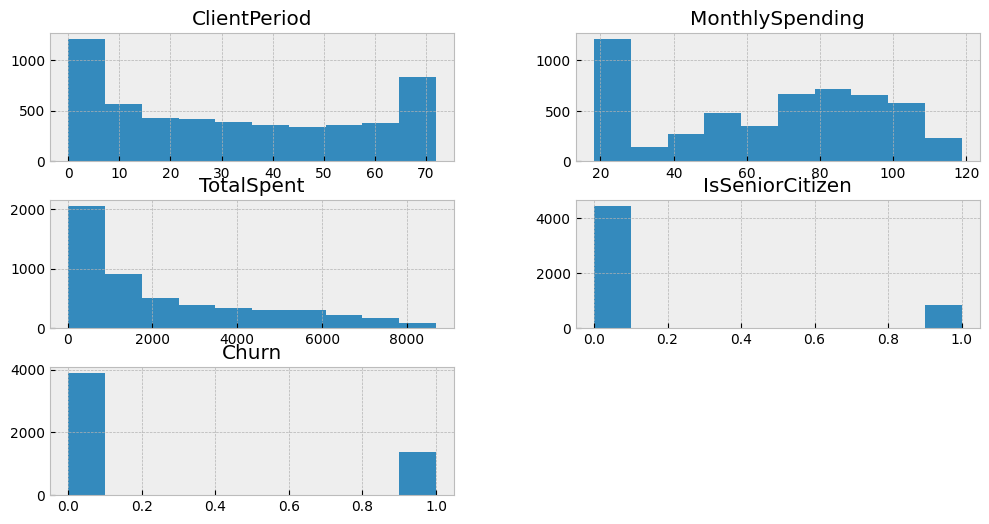

In [ ]:
data.hist(figsize=(12, 6))

---
**Мысли автора**

Категориальные признаки IsSeniorCitizen и Charn имеют неравномерность в распределении значений.

Признаки ClientPeriod и MonthlySpending имеют +/- равномерное распределение.

Признак TotalSpent имеет экспоненциальное распределение.

---

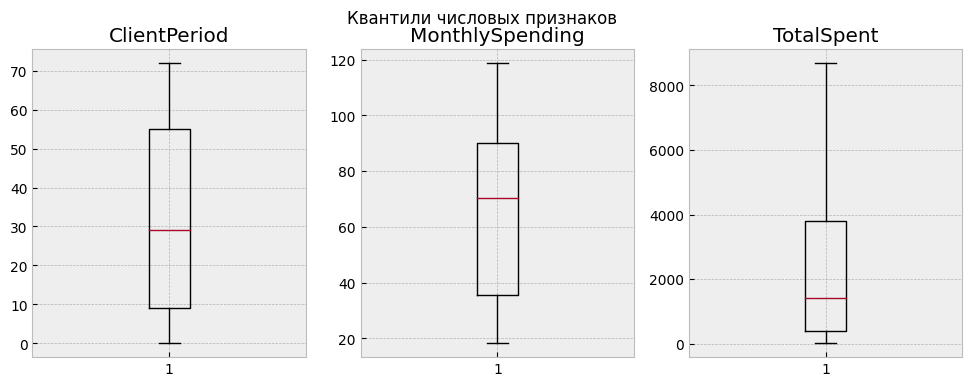

In [ ]:
figure, axs = plt.subplots(1,3)
figure.set_figwidth(12)
figure.set_figheight(4)
figure.suptitle('Квантили числовых признаков')

for i, column in enumerate(NUM_COLS):
  axs[i].boxplot(data[column])
  axs[i].set_title(column)

---
**Мысли автора**

Выбросов значений нет, хотя к TotalSpent надо присмотреться...

---

In [ ]:
data.describe()

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,2287.520579,0.159409,0.262022
std,24.550326,30.176464,2269.014643,0.366092,0.439776
min,0.000000,18.250000,18.800000,0.000000,0.000000
25%,9.000000,35.462500,395.725000,0.000000,0.000000
50%,29.000000,70.400000,1405.650000,0.000000,0.000000
75%,55.000000,90.050000,3795.212500,0.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000


---
**Мысли автора**

Убедимся наверняка*

---

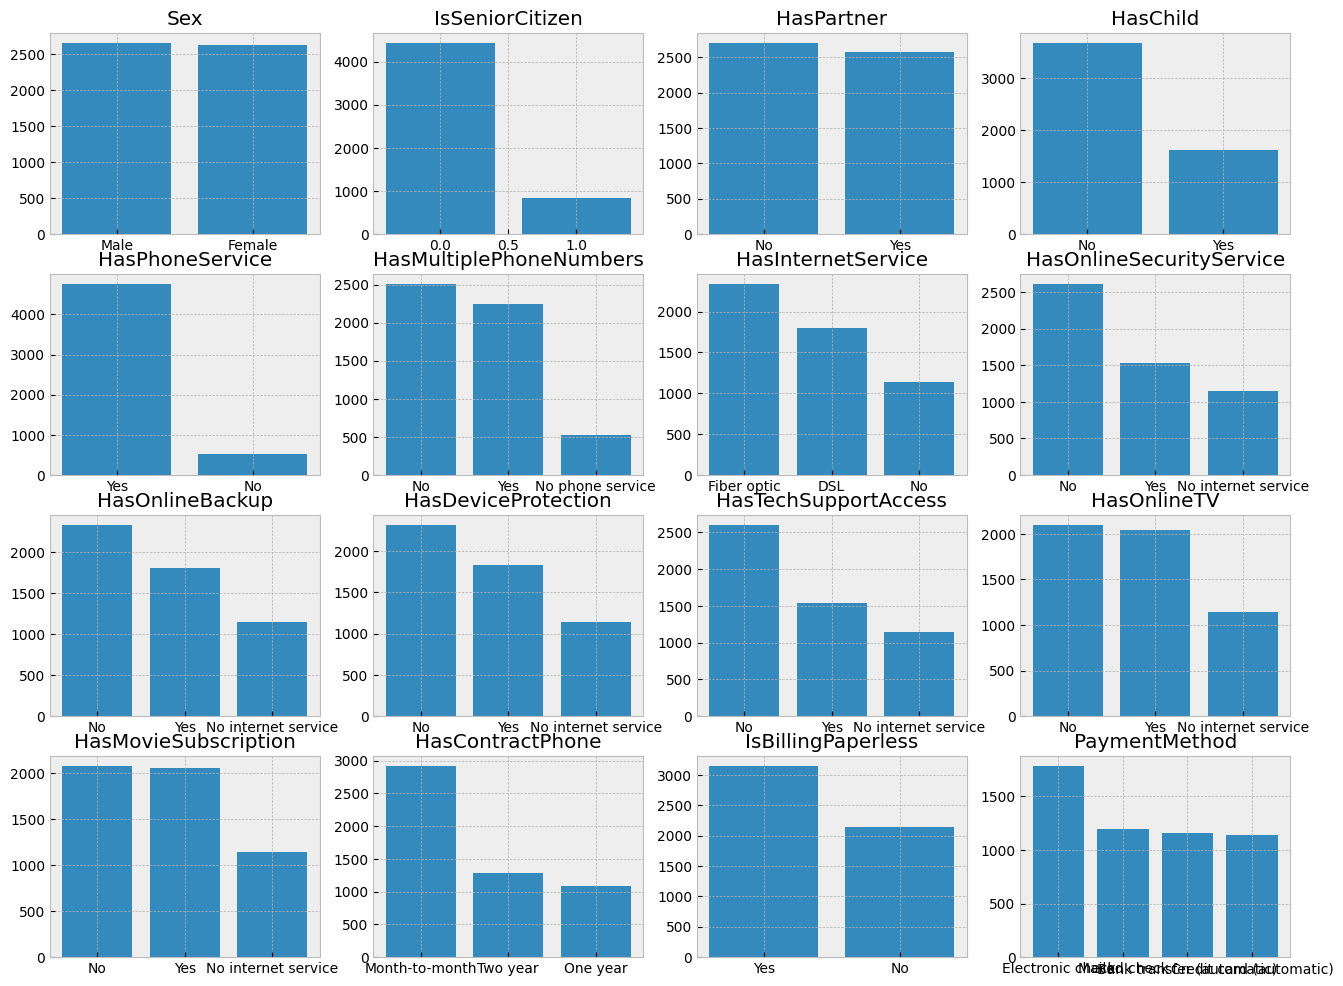

In [ ]:
figure, axs = plt.subplots(4, 4)
figure.set_figwidth(16)
figure.set_figheight(12)


for i, column in enumerate(CAT_COLS):
  val_count = data[column].value_counts()
  axs[i//4, i%4].bar(val_count.index, val_count.values)
  axs[i//4, i%4].set_title(column)


---
**Мысли автора**

Так-с... Тут много чего интересного)

1. IsSeniorCitizen - несбалансирован
2. HasOhoneService - несбалансирован
3. HasMultiplePhoneNumbers - значение 'No phone service' вытекает из предыдущего признака
4. HasOnlineSecurityService, HasOnlineBackup, HasDeviceProtection, HasTechSuppotAccess, HasOnlineTV, HasMovieSubscription - значение 'No internet service' вытекает из HasInternetService
5. Вроде как признаки HasOnlineBackup и HasDeviceProtection равны. Убедимся на тепловой диаграмме.

---

---
**Мысли автора**

Уберем значения, которые являются следствиями каких то предыдущих признаков.

---

In [92]:
REPLACED_VALUES = ['No phone service', 'No internet service']
REPLACED_COLS = [
    'HasMultiplePhoneNumbers',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
]


def replace_to_no(df: pd.DataFrame):
  """Заменяет значения признаков, которые вытекают из других принзаков, на No"""
  df[REPLACED_COLS] = df[REPLACED_COLS].replace(REPLACED_VALUES, 'No')

replace_to_no(data)

<Axes: >

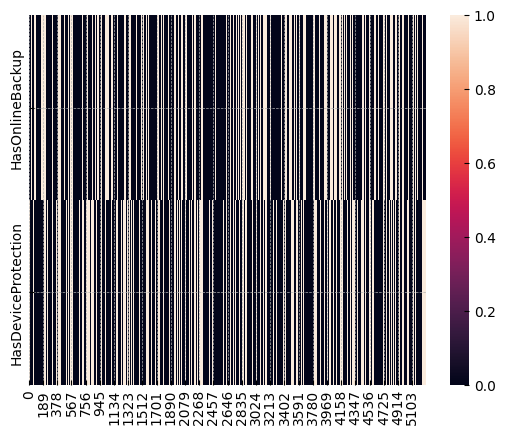

In [98]:
from sklearn.preprocessing import LabelEncoder


QUESTION_COLS = [
    'HasOnlineBackup',
    'HasDeviceProtection',
]


label_encoder = LabelEncoder()
data_2 = pd.DataFrame()
for column in QUESTION_COLS:
  data_2[column] = LabelEncoder().fit_transform(data[column])

sns.heatmap(data_2.transpose())

---
**Мысли автора**

Видно что значения не синхронны, значит признаки HasOnlineBackup и HasDeviceProtection не равны (5 убеждение выше не верно)

---

---
**Мысли автора**

Преобразуем категориальные-бинарные признаки через LabelEncoder. Так как значения бинарные, то преобразования ДО разделения на train и test (ДУМАЮ) существенно не повлияют.

---

In [103]:
BINAR_COLS = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'IsBillingPaperless'
]

def binar_label_encoding(df: pd.DataFrame):
  """Преобразует бинарные признаки через label encoder"""
  for column in BINAR_COLS:
    df[column] = LabelEncoder().fit_transform(df[column])

binar_label_encoding(data)

In [104]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,1,0,1,1,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,0
1,72,25.85,1872.20,1,0,1,0,1,1,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),0
2,1,75.90,75.90,1,0,0,0,1,0,Fiber optic,0,0,0,1,0,0,Month-to-month,1,Electronic check,1
3,32,79.30,2570.00,0,1,1,0,1,1,Fiber optic,0,0,1,0,0,0,Month-to-month,0,Mailed check,0
4,60,115.25,6758.45,0,0,1,1,1,1,Fiber optic,1,1,1,1,1,1,Two year,0,Credit card (automatic),0


Text(0.5, 1.02, 'Зависимости числовых признаков м/у собой')

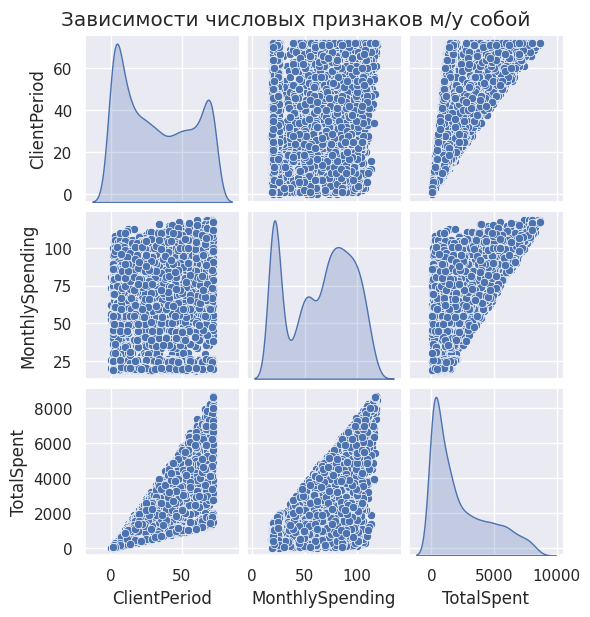

In [116]:
pair = sns.pairplot(data[NUM_COLS], height = 2 ,kind ='scatter',diag_kind='kde')
pair.fig.suptitle('Зависимости числовых признаков м/у собой', y=1.02)

---
**Мысли автора**

Видна корреляция между TotalSpent & ClientPeriod и TotalSpent & MonthlySpending.

Предполагаю, что TotalSpent = ClientPeriod * MonthlySpending

---

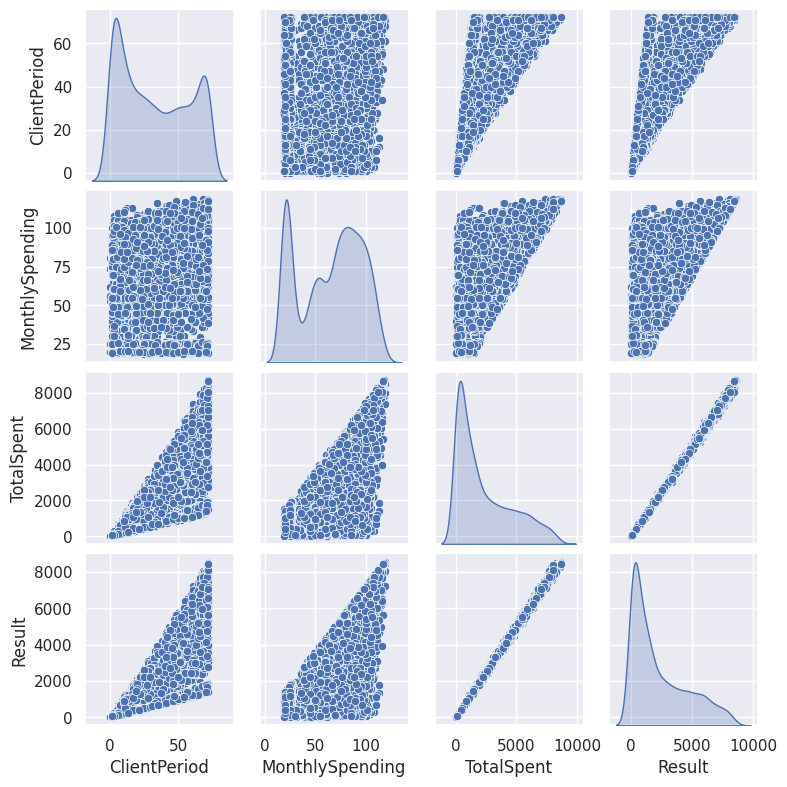

In [108]:
data_2 = pd.DataFrame(data[NUM_COLS])
data_2['Result'] = data['ClientPeriod'] * data['MonthlySpending']

sns.pairplot(data_2, height = 2, kind ='scatter', diag_kind='kde')

---
**Мысли автора**

Поздравляем, мы ее нашли!!! Убираем ее)

---

In [149]:
def delete_total_spent(df: pd.DataFrame):
  """Убирает признак TotalSpent"""
  df.drop(columns=['TotalSpent'], inplace=True)

delete_total_spent(data)

In [478]:
from sklearn.base import BaseEstimator, TransformerMixin


class DropTransformer(BaseEstimator, TransformerMixin):
  """Удаляет ненужные признаки."""
  def __init__(self, columns):
    self.columns = columns

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    X.drop(columns=self.columns, inplace=True)
    return X


class CategoricalTransformer(BaseEstimator, TransformerMixin):
  """Делает необходимые преобразования для категориальных признаков."""

  def fit(self, X, y=None):
    return self

  def transform(self, X, y=None):
    replace_to_no(X)
    binar_label_encoding(X)
    return X

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [509]:
from sklearn.model_selection import train_test_split

data = pd.read_csv('./train.csv')
X_all = data.drop(columns=['Churn'])
y_all = data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, stratify=y_all)

In [490]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer

ALL_COLS = data.drop(columns=['Churn']).columns
DROP_COLS = ['TotalSpent', ]
NUM_COLS_2 = list(set(NUM_COLS) - set(DROP_COLS))

cat_transform = make_pipeline(
    CategoricalTransformer(),
    OneHotEncoder(handle_unknown='ignore', sparse_output=False),
)

preprocessor = ColumnTransformer([
    ('drop', DropTransformer(DROP_COLS), DROP_COLS),
    ('nums', StandardScaler(), NUM_COLS_2),
    ('cat', cat_transform, CAT_COLS)
], verbose_feature_names_out = False)

alg = Pipeline([
    ('preprocessor', preprocessor),
    ('models', LogisticRegression())
])
alg

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop',
                                                  DropTransformer(columns=['TotalSpent']),
                                                  ['TotalSpent']),
                                                 ('nums', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending']),
                                                 ('cat',
                                                  Pipeline(steps=[('categoricaltransformer',
                                                                   CategoricalTransformer()),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex',...itizen',
                                                   'HasPartner', 'HasChild',
                                                   'HasPhoneService',
                                                   'HasMultiplePhoneNumbers',
                                                   'HasInternetService',
                                                   'HasOnlineSecurityService',
                                                   'HasOnlineBackup',
                                                   'HasDeviceProtection',
                                                   'HasTechSupportAccess',
                                                   'HasOnlineTV',
                                                   'HasMovieSubscription',
                                                   'HasContractPhone',
                                                   'IsBillingPaperless',
                                                   'PaymentMethod'])],
                                   verbose_feature_names_out=False)),
                ('models', LogisticRegression())])

In [491]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'models__max_iter': [300, 350, 400],
    'models__C': [1.2, 1.1, 1, 0.9, 0.8],
}

gs = GridSearchCV(
  alg, parameters,
  cv=5, verbose=2,
  n_jobs=2
)

gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 15 candidates, totalling 75 fits


{'models__C': 0.8, 'models__max_iter': 300}

In [492]:
from sklearn.metrics import roc_auc_score, roc_curve

preds_gs = gs.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, preds_gs)

0.8511015458668887

In [493]:
alg_cv = Pipeline([
    ('preprocessor', preprocessor),
    ('models',  LogisticRegressionCV(Cs=np.logspace(-10, 30, 200), refit=True, scoring='roc_auc'))
])

alg_cv.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('drop',
                                                  DropTransformer(columns=['TotalSpent']),
                                                  ['TotalSpent']),
                                                 ('nums', StandardScaler(),
                                                  ['ClientPeriod',
                                                   'MonthlySpending']),
                                                 ('cat',
                                                  Pipeline(steps=[('categoricaltransformer',
                                                                   CategoricalTransformer()),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Sex',...
       2.38168555e+25, 3.78346262e+25, 6.01027678e+25, 9.54771611e+25,
       1.51671689e+26, 2.40940356e+26, 3.82749448e+26, 6.08022426e+26,
       9.65883224e+26, 1.53436841e+27, 2.43744415e+27, 3.87203878e+27,
       6.15098579e+27, 9.77124154e+27, 1.55222536e+28, 2.46581108e+28,
       3.91710149e+28, 6.22257084e+28, 9.88495905e+28, 1.57029012e+29,
       2.49450814e+29, 3.96268864e+29, 6.29498899e+29, 1.00000000e+30]),
                                      scoring='roc_auc'))])

In [494]:
preds_cv = alg_cv.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, preds_cv)

0.8511385726187171

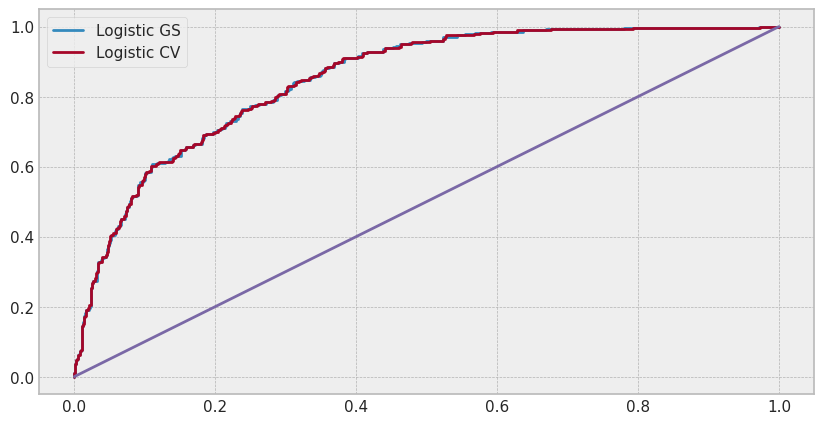

In [495]:

fpr_gs, tpr_gs, _ = roc_curve(y_test, preds_gs)
fpr_cv, tpr_cv, _ = roc_curve(y_test, preds_cv)

plt.figure(figsize=(10,5))
plt.plot(fpr_gs, tpr_gs, label='Logistic GS')
plt.plot(fpr_cv, tpr_cv, label='Logistic CV')
plt.plot([0, 1], [0, 1])
plt.legend()

plt.show()

---
**Мысли автора**

Красота, ляпота.
0.85 считаю нормально для линейной регрессии. У кого лучше?)

---

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [283]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.1 MB/s eta 0:00:00


In [498]:
from catboost import CatBoostClassifier, CatBoost

cat_bost = CatBoost({'cat_features': CAT_COLS})
cat_bost.fit(X_train, y_train)

Learning rate set to 0.051411
0:	learn: 0.4340134	total: 25.9ms	remaining: 25.9s
1:	learn: 0.4288138	total: 40.3ms	remaining: 20.1s
2:	learn: 0.4238026	total: 54.5ms	remaining: 18.1s
3:	learn: 0.4190791	total: 83ms	remaining: 20.7s
4:	learn: 0.4148463	total: 96.7ms	remaining: 19.2s
5:	learn: 0.4110483	total: 111ms	remaining: 18.4s
6:	learn: 0.4075914	total: 122ms	remaining: 17.4s
7:	learn: 0.4043040	total: 133ms	remaining: 16.5s
8:	learn: 0.4015977	total: 143ms	remaining: 15.7s
9:	learn: 0.3995835	total: 147ms	remaining: 14.5s
10:	learn: 0.3967613	total: 160ms	remaining: 14.4s
11:	learn: 0.3944025	total: 170ms	remaining: 14s
12:	learn: 0.3920338	total: 184ms	remaining: 14s
13:	learn: 0.3899446	total: 197ms	remaining: 13.9s
14:	learn: 0.3880358	total: 209ms	remaining: 13.7s
15:	learn: 0.3866984	total: 215ms	remaining: 13.3s
16:	learn: 0.3850444	total: 227ms	remaining: 13.1s
17:	learn: 0.3835441	total: 238ms	remaining: 13s
18:	learn: 0.3820327	total: 249ms	remaining: 12.9s
19:	learn: 0.3

In [511]:
preds_boost = cat_bost.predict(X_test)

roc_auc_score(y_test, preds_boost)

0.9056974914375637

---
**Мысли автора**

Так сразу и 0,9+... А я тут танцую с бубнами. До чего технологии дошли)

---

In [513]:
parameters = {
    'iterations': [420, 450, 480],
    'depth': [2, 3, 4,],
}

gs_cat_boost = GridSearchCV(
  CatBoostClassifier(cat_features=CAT_COLS), parameters,
  cv=5, verbose=2,
  n_jobs=2
)

gs_cat_boost.fit(X_train, y_train)
gs_cat_boost.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Learning rate set to 0.042232
0:	learn: 0.6723258	total: 12.6ms	remaining: 5.28s
1:	learn: 0.6513038	total: 27.1ms	remaining: 5.66s
2:	learn: 0.6325079	total: 38.8ms	remaining: 5.39s
3:	learn: 0.6143867	total: 49.4ms	remaining: 5.14s
4:	learn: 0.6016993	total: 60.3ms	remaining: 5.01s
5:	learn: 0.5879599	total: 71ms	remaining: 4.9s
6:	learn: 0.5758265	total: 82.8ms	remaining: 4.88s
7:	learn: 0.5649349	total: 96.5ms	remaining: 4.97s
8:	learn: 0.5529392	total: 108ms	remaining: 4.94s
9:	learn: 0.5417759	total: 121ms	remaining: 4.95s
10:	learn: 0.5318022	total: 130ms	remaining: 4.85s
11:	learn: 0.5229058	total: 147ms	remaining: 4.99s
12:	learn: 0.5144803	total: 162ms	remaining: 5.09s
13:	learn: 0.5052165	total: 174ms	remaining: 5.04s
14:	learn: 0.4980887	total: 182ms	remaining: 4.92s
15:	learn: 0.4912555	total: 194ms	remaining: 4.89s
16:	learn: 0.4845823	total: 207ms	remaining: 4.91s
17:	learn: 0.4783611	total: 219ms	remaining: 4.8

{'depth': 4, 'iterations': 420}

In [515]:
preds_gs_cat = gs_cat_boost.predict_proba(X_test)[:, 1]

roc_auc_score(y_test, preds_gs_cat)

0.8477228547625659

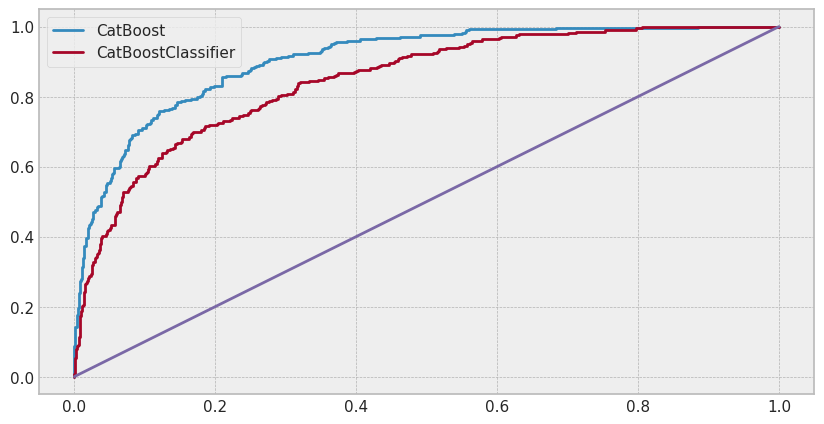

In [524]:
fpr_boost, tpr_boost, _ = roc_curve(y_test, preds_boost)
fpr_gs_cat, tpr_gs_cat, _ = roc_curve(y_test, preds_gs_cat)

plt.figure(figsize=(10,5))
plt.plot(fpr_boost, tpr_boost, label='CatBoost')
plt.plot(fpr_gs_cat, tpr_gs_cat, label='CatBoostClassifier')
plt.plot([0, 1], [0, 1])
plt.legend()

plt.show()

---
**Мысли автора**

Не знаю почему, но CatBoost обычный показал результаты, чем CatBoostClassifier, предназначенный для решения задач классификации.

---

# Предсказания

In [517]:
best_model = alg_cv

In [523]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv', index_col='Id')

submission['Churn'] = best_model.predict_proba(X_test)[:, 1]
submission.to_csv('./my_submission.csv', index='Id')

Лучшее решение отправьте в Stepik. Кому интересно 0.85 на тесте линейной регрессией)